In [72]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
trainer=pd.read_csv('train.csv')
trainer.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
tester=pd.read_csv('test.csv')
tester.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
def categorize_age(age):
    if age == '0-17':
        return 1
    elif age == '18-25':
        return 2
    elif age == '26-35':
        return 3
    elif age == '36-45':
        return 4
    elif age == '46-50':
        return 5
    elif age == '51-55':
        return 6
    elif age == '55+':
        return 7

In [6]:
trainer['age_categ']=trainer['Age'].apply(lambda x: categorize_age(x))

In [8]:
trainer.drop('Age',axis=1,inplace=True)
trainer.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_categ
0,1000001,P00069042,F,10,A,2,0,3,NaN,NaN,8370,1
1,1000001,P00248942,F,10,A,2,0,1,6.0,14.0,15200,1
2,1000001,P00087842,F,10,A,2,0,12,NaN,NaN,1422,1
3,1000001,P00085442,F,10,A,2,0,12,14.0,NaN,1057,1
4,1000002,P00285442,M,16,C,4+,0,8,NaN,NaN,7969,7


In [11]:
tester['age_categ']=tester['Age'].apply(lambda x: categorize_age(x))

In [13]:
tester.drop('Age',axis=1,inplace=True)
tester.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ
0,1000004,P00128942,M,7,B,2,1,1,11.0,NaN,5
1,1000009,P00113442,M,17,C,0,0,3,5.0,NaN,3
2,1000010,P00288442,F,1,B,4+,1,5,14.0,NaN,4
3,1000010,P00145342,F,1,B,4+,1,4,9.0,NaN,4
4,1000011,P00053842,F,1,C,1,0,4,5.0,12.0,3


In [20]:
trainer=pd.concat([trainer,gender],axis=1)

In [22]:
trainer.head()

,User_ID,Product_ID,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_categ,M
0,1000001,P00069042,10,A,2,0,3,NaN,NaN,8370,1,0
1,1000001,P00248942,10,A,2,0,1,6.0,14.0,15200,1,0
2,1000001,P00087842,10,A,2,0,12,NaN,NaN,1422,1,0
3,1000001,P00085442,10,A,2,0,12,14.0,NaN,1057,1,0
4,1000002,P00285442,16,C,4+,0,8,NaN,NaN,7969,7,1


In [23]:
gender=pd.get_dummies(tester['Gender'],drop_first=True)

In [24]:
tester.drop('Gender',axis=1,inplace=True)

In [25]:
tester=pd.concat([tester,gender],axis=1)

In [26]:
tester.head()

,User_ID,Product_ID,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M
0,1000004,P00128942,7,B,2,1,1,11.0,NaN,5,1
1,1000009,P00113442,17,C,0,0,3,5.0,NaN,3,1
2,1000010,P00288442,1,B,4+,1,5,14.0,NaN,4,0
3,1000010,P00145342,1,B,4+,1,4,9.0,NaN,4,0
4,1000011,P00053842,1,C,1,0,4,5.0,12.0,3,0


In [27]:
trainer.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [28]:
trainer.head()

,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_categ,M
0,10,A,2,0,3,NaN,NaN,8370,1,0
1,10,A,2,0,1,6.0,14.0,15200,1,0
2,10,A,2,0,12,NaN,NaN,1422,1,0
3,10,A,2,0,12,14.0,NaN,1057,1,0
4,16,C,4+,0,8,NaN,NaN,7969,7,1


In [29]:
tester.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [30]:
tester.head()

,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M
0,7,B,2,1,1,11.0,NaN,5,1
1,17,C,0,0,3,5.0,NaN,3,1
2,1,B,4+,1,5,14.0,NaN,4,0
3,1,B,4+,1,4,9.0,NaN,4,0
4,1,C,1,0,4,5.0,12.0,3,0


In [32]:
trainer.fillna(0,inplace=True)

In [33]:
tester.fillna(0,inplace=True)

In [34]:
trainer.head()

,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_categ,M
0,10,A,2,0,3,0.0,0.0,8370,1,0
1,10,A,2,0,1,6.0,14.0,15200,1,0
2,10,A,2,0,12,0.0,0.0,1422,1,0
3,10,A,2,0,12,14.0,0.0,1057,1,0
4,16,C,4+,0,8,0.0,0.0,7969,7,1


In [35]:
def city_years(years):
    if years=='4+':
        return 4
    return years

In [36]:
trainer['city_years']=trainer['Stay_In_Current_City_Years'].apply(lambda x: city_years(x))

In [37]:
trainer.drop('Stay_In_Current_City_Years',axis=1,inplace=True)

In [38]:
trainer.head()

,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_categ,M,city_years
0,10,A,0,3,0.0,0.0,8370,1,0,2
1,10,A,0,1,6.0,14.0,15200,1,0,2
2,10,A,0,12,0.0,0.0,1422,1,0,2
3,10,A,0,12,14.0,0.0,1057,1,0,2
4,16,C,0,8,0.0,0.0,7969,7,1,4


In [39]:
tester['city_years']=tester['Stay_In_Current_City_Years'].apply(lambda x: city_years(x))

In [40]:
tester.drop('Stay_In_Current_City_Years',axis=1,inplace=True)

In [42]:
tester.head()

,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M,city_years
0,7,B,1,1,11.0,0.0,5,1,2
1,17,C,0,3,5.0,0.0,3,1,0
2,1,B,1,5,14.0,0.0,4,0,4
3,1,B,1,4,9.0,0.0,4,0,4
4,1,C,0,4,5.0,12.0,3,0,1


In [43]:
city=pd.get_dummies(trainer['City_Category'],drop_first=False)
trainer.drop('City_Category',axis=1,inplace=True)
trainer=pd.concat([trainer,city],axis=1)

In [44]:
trainer.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_categ,M,city_years,A,B,C
0,10,0,3,0.0,0.0,8370,1,0,2,1,0,0
1,10,0,1,6.0,14.0,15200,1,0,2,1,0,0
2,10,0,12,0.0,0.0,1422,1,0,2,1,0,0
3,10,0,12,14.0,0.0,1057,1,0,2,1,0,0
4,16,0,8,0.0,0.0,7969,7,1,4,0,0,1


In [45]:
city=pd.get_dummies(tester['City_Category'],drop_first=False)
tester.drop('City_Category',axis=1,inplace=True)
tester=pd.concat([tester,city],axis=1)

In [46]:
tester.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M,city_years,A,B,C
0,7,1,1,11.0,0.0,5,1,2,0,1,0
1,17,0,3,5.0,0.0,3,1,0,0,0,1
2,1,1,5,14.0,0.0,4,0,4,0,1,0
3,1,1,4,9.0,0.0,4,0,4,0,1,0
4,1,0,4,5.0,12.0,3,0,1,0,0,1


In [50]:
from sklearn.model_selection import train_test_split

In [54]:
trainer_train,trainer_test,purchase_train,purchase_test=train_test_split(trainer.drop('Purchase',axis=1),trainer['Purchase'],test_size=0.2)

In [55]:
trainer_train.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M,city_years,A,B,C
332379,4,0,2,4.0,5.0,2,0,2,1,0,0
380003,18,1,5,0.0,0.0,2,1,1,0,1,0
277250,12,0,11,0.0,0.0,3,1,1,1,0,0
329581,16,0,15,0.0,0.0,7,1,3,1,0,0
98079,14,1,8,17.0,0.0,3,0,3,1,0,0


In [56]:
purchase_train.head()

332379    12759
380003     5272
277250     4545
329581     8650
98079      7831
Name: Purchase, dtype: int64

In [65]:
training=pd.concat([trainer_train,purchase_train],axis=1)

In [67]:
training.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M,city_years,A,B,C,Purchase
332379,4,0,2,4.0,5.0,2,0,2,1,0,0,12759
380003,18,1,5,0.0,0.0,2,1,1,0,1,0,5272
277250,12,0,11,0.0,0.0,3,1,1,1,0,0,4545
329581,16,0,15,0.0,0.0,7,1,3,1,0,0,8650
98079,14,1,8,17.0,0.0,3,0,3,1,0,0,7831


In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
target='Purchase'

In [68]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Purchase'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Purchase'], cv=cv_folds, scoring='mean_squared_error')
    
    #Print model report:
    print("\nModel Report")
    print("MSE : %.10g" % metrics.mean_squared_error(dtrain['Purchase'].values, dtrain_predictions))
    print("RMSE Score (Train): %f" % np.sqrt(metrics.mean_squared_error(dtrain['Purchase'], dtrain_predictions)))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
                
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\sit


Model Report
MSE : 5462482.235
RMSE Score (Train): 2337.195378
CV Score : Mean - -9629774 | Std - 54057.27 | Min - -9684358 | Max - -9537181


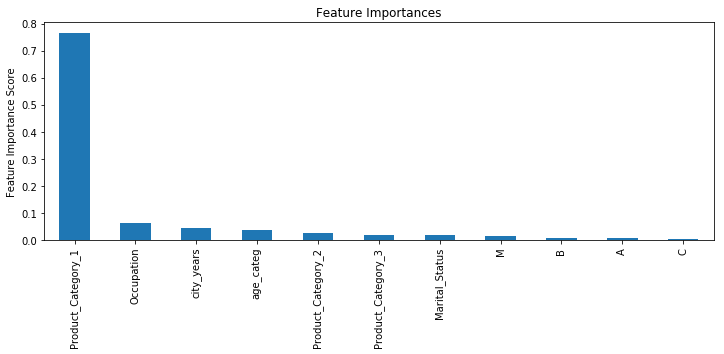

In [73]:
predictors = [x for x in training.columns if x not in [target]]
gbm0 = RandomForestRegressor(random_state=10)
modelfit(gbm0, training, predictors)

In [77]:
gbm0.fit(trainer_train,purchase_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [78]:
pred=gbm0.predict(trainer_test)

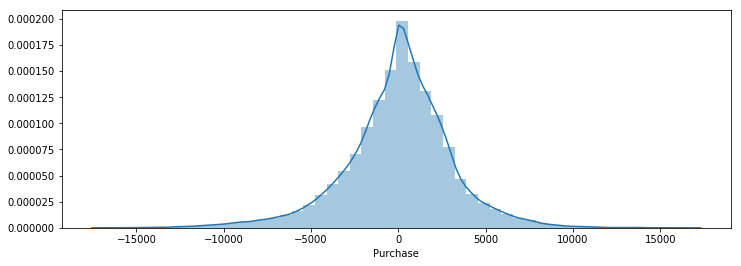

In [79]:
sns.distplot((purchase_test-pred),bins=50);

In [80]:
print('MAE:', metrics.mean_absolute_error(purchase_test, pred))
print('MSE:', metrics.mean_squared_error(purchase_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(purchase_test, pred)))

MAE: 2240.07681463
MSE: 9494375.27167
RMSE: 3081.29441496


In [82]:
tester

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M,city_years,A,B,C
0,7,1,1,11.0,0.0,5,1,2,0,1,0
1,17,0,3,5.0,0.0,3,1,0,0,0,1
2,1,1,5,14.0,0.0,4,0,4,0,1,0
3,1,1,4,9.0,0.0,4,0,4,0,1,0
4,1,0,4,5.0,12.0,3,0,1,0,0,1
5,1,1,2,3.0,15.0,5,1,3,0,0,1
6,1,1,1,11.0,15.0,5,1,3,0,0,1
7,1,1,2,4.0,9.0,5,1,3,0,0,1
8,7,0,10,13.0,16.0,3,1,1,1,0,0
9,15,0,5,14.0,0.0,2,1,4,1,0,0


In [83]:
final=pd.read_csv('test.csv')

In [84]:
final.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [89]:
tester.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M,city_years,A,B,C
0,7,1,1,11.0,0.0,5,1,2,0,1,0
1,17,0,3,5.0,0.0,3,1,0,0,0,1
2,1,1,5,14.0,0.0,4,0,4,0,1,0
3,1,1,4,9.0,0.0,4,0,4,0,1,0
4,1,0,4,5.0,12.0,3,0,1,0,0,1


In [90]:
predictt=gbm0.predict(tester)

In [91]:
predictt

array([ 16942.5       ,   8859.4       ,   7990.11797619, ...,
        13731.95      ,  23156.7       ,   2739.1       ])

In [92]:
len(predictt)

233599

In [93]:
len(final)

233599

In [95]:
final['Purchase']=predictt

In [96]:
final.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,16942.500000
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,8859.400000
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,7990.117976
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,2095.300000
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,3185.020000


In [100]:
final.to_csv('Res.csv')

In [98]:
predictors = [x for x in trainer.columns if x not in [target]]
param_test1 = {'n_estimators':np.arange(5,16,2)}
gsearch1 = GridSearchCV(estimator = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, oob_score=False, 
           random_state=10, verbose=0, warm_start=False), 
param_grid = param_test1, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch1.fit(trainer[predictors],trainer[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -18024905.83061, std: 2095584.09090, params: {'n_estimators': 5},
  mean: -18024676.35644, std: 2095632.38111, params: {'n_estimators': 7},
  mean: -18025161.65852, std: 2097012.89070, params: {'n_estimators': 9},
  mean: -18025308.04791, std: 2097278.30804, params: {'n_estimators': 11},
  mean: -18026243.49074, std: 2099603.61049, params: {'n_estimators': 13},
  mean: -18025990.64914, std: 2098878.27116, params: {'n_estimators': 15}],
 {'n_estimators': 7},
 -18024676.356440037)

C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\sit


Model Report
MSE : 17379242.04
RMSE Score (Train): 4168.841811
CV Score : Mean - -1.737963e+07 | Std - 93469.76 | Min - -1.752911e+07 | Max - -1.726454e+07


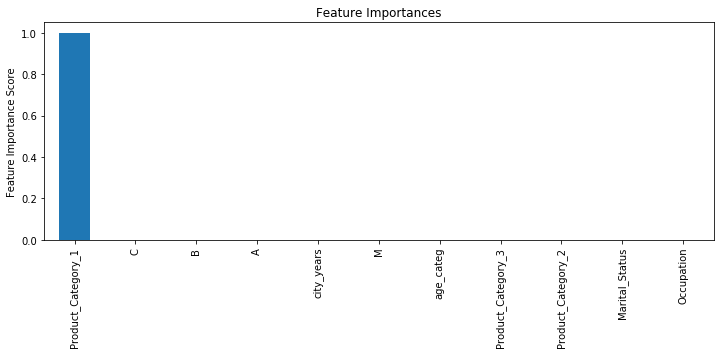

In [99]:
modelfit(gsearch1.best_estimator_, training, predictors)